In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing all necessary packages and files
import argparse
from ConfigParser import SafeConfigParser
import os
from numpy import *
from IPython.display import Image

#image generator is used to simulate an image to sample
import image_generator.image_generator as ig

#multimodal nested sampling and self organizing map is used to sample the simulated image.
import model_nest_som.model_nest_som as ns

#finding clusters in sampled data
import post_sampling.post_sampling as ps

import timeit

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [5]:
#set the prefix for the run
prefix = 0


In [6]:
#accessing the configuration file
parser = SafeConfigParser()
parser.read("config.ini")

output_dir = parser.get("Misc", "location") + "/" + str(prefix)
os.system('mkdir -p ' + output_dir)

0

In [7]:
#change prefix and write
parser.set("Misc","prefix",str(prefix))

#setting plot to false to displable plotting after every 500 iteration
parser.set("Output", "plot","False")
fileout = "files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
F = open(fileout,'w')
parser.write(F)
F.close()

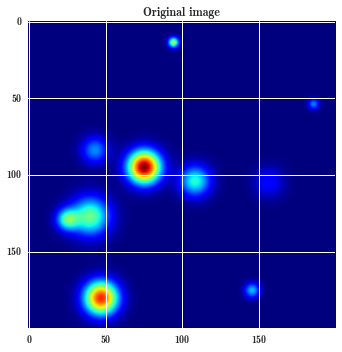

In [8]:
#simulating a 200*200 pixel image
start1 = timeit.default_timer()
ig.run(fileout)
data = load("files/" + str(prefix) + "/" + str(prefix) + "_clean.npy")
plt.title('Original image')
plt.imshow(data,cmap="jet");
stop1 = timeit.default_timer()

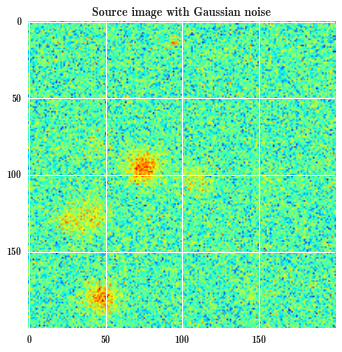

In [12]:
data = load("files/" + str(prefix) + "/" + str(prefix) + "_noised.npy")
plt.title('Original image')
plt.imshow(data,cmap="jet");
plt.title('Source image with Gaussian noise')
stop1 = timeit.default_timer()

In [9]:
#sampling the image using multimodal nested sampling and self-organizing map 
#self organizing map is used to better inform the sampler the location to sample in by identifying areas of 
#higher likelihood and increasing the probability of the samplerto cover those regions.

start2 = timeit.default_timer()
ns.run(fileout)
stop2 = timeit.default_timer()

done with active
79440 Log evaluations
wrote to file: files/0/0_processed_detected.txt
wrote to file: files/0/0_all_detected.txt


TP:  7 FP:  4 Undetected:  3


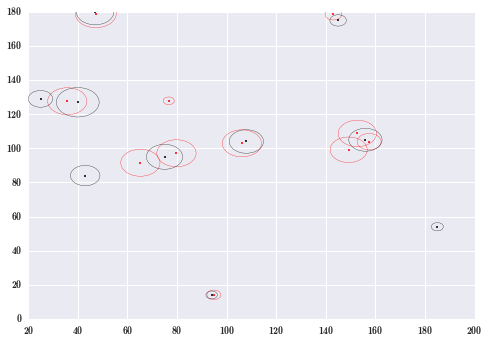

In [10]:
#working with the sampled data to fetch objects
#clustering methods are used to identify sources of high likehood.
start3 = timeit.default_timer()
ps.run(fileout)
stop3 = timeit.default_timer()

In [11]:
#calculating the overall time taken
print "Time taken", (stop1 - start1) + (stop2 - start2) + (stop3 - start3), 'seconds'

Time taken 321.589010239 seconds


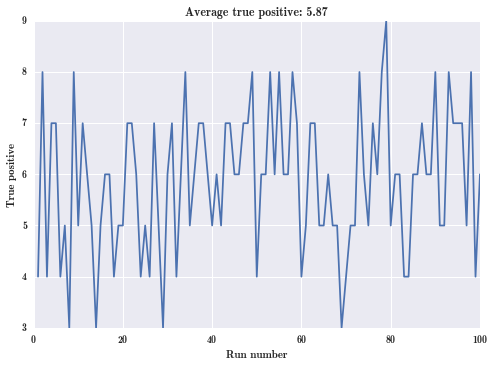

In [16]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

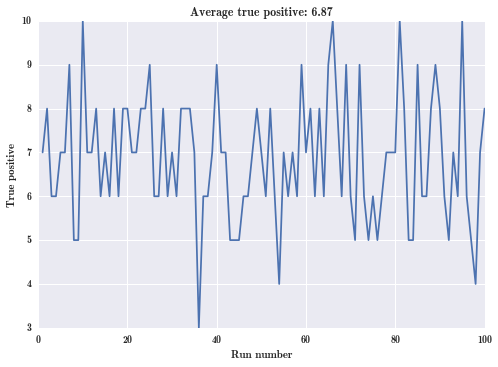

In [17]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

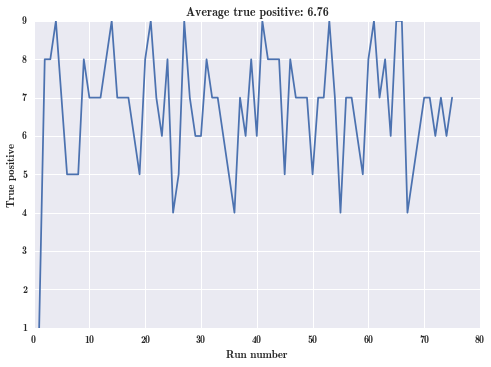

In [18]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

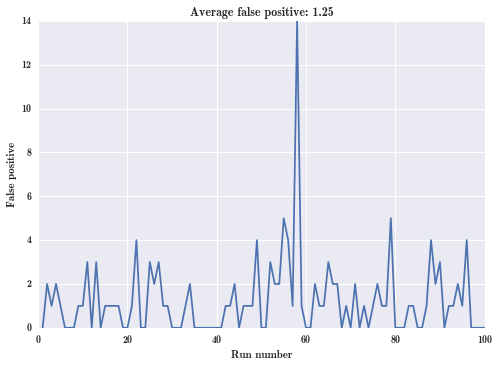

In [19]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,1])
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

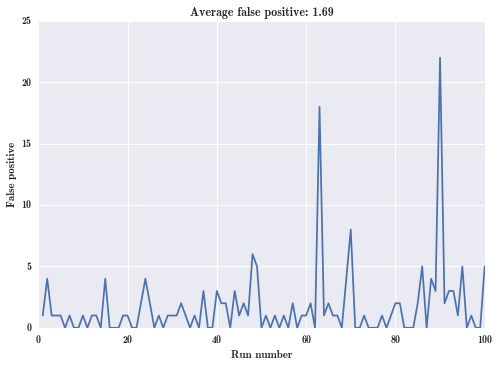

In [20]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,1])
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

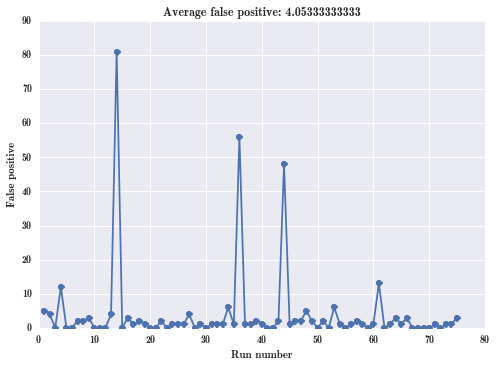

In [21]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,1], marker='o')
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

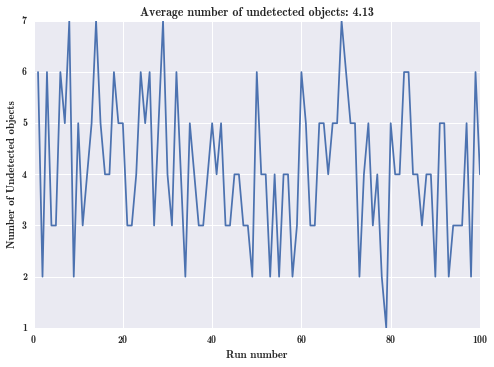

In [22]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

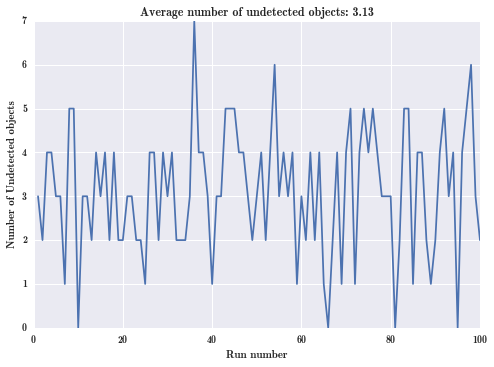

In [23]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

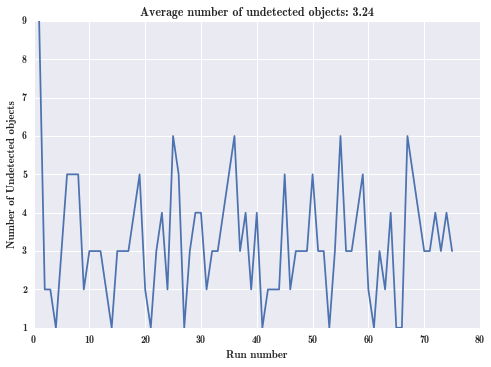

In [24]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

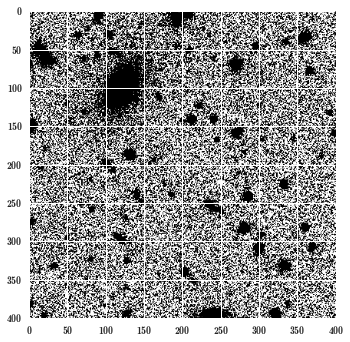

In [4]:
import pyfits as pf
H=pf.open('files/original_images/test3_i.fits')
Image=H[0].data
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001) 
plt.show()

In [ ]:
import test_original as oi

oi.run(Image)

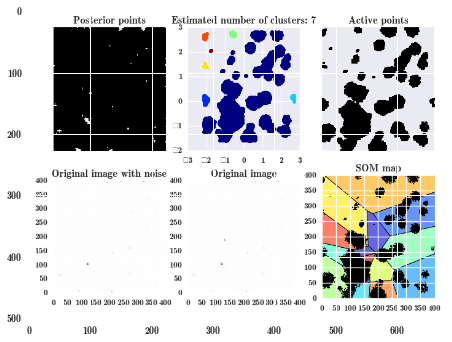

In [8]:
img=mpimg.imread('files/original_images/plots/6plot/all6_36500.png')
plt.imshow(img)

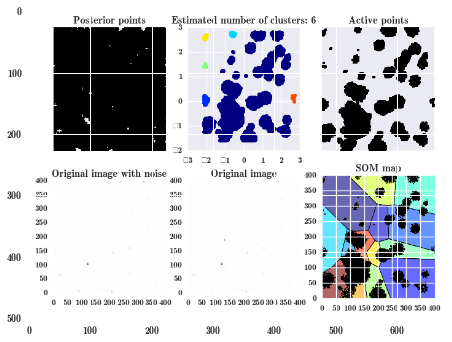

In [9]:
img=mpimg.imread('files/original_images/plots/6plot/all6_37000.png')
plt.imshow(img)

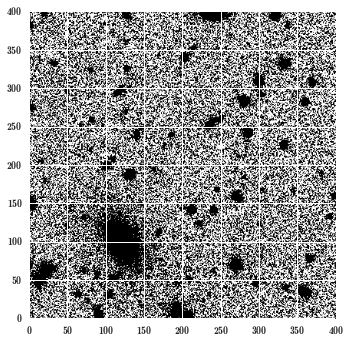

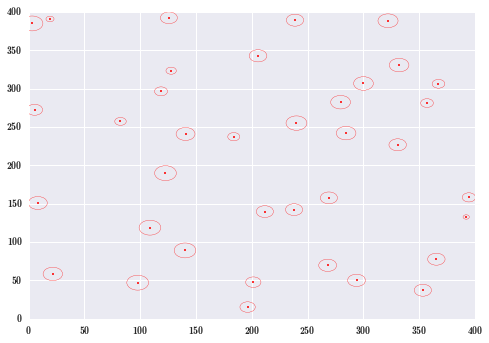

In [25]:
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
plt.show()
prefix = 'original_images'
fileout="files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
ps.run(fileout)